In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import time
import matplotlib.pyplot as plt

## Gathering

There are 3 datasets to gather: 
1. The WeRateDogs twitter archive
2. Tweet image predictions
3. Each tweet's retweet and like counts

### Gathering the WeRateDogs twitter archive
This file has been provided.

In [2]:
t_archive = pd.read_csv('twitter-archive-enhanced.csv')
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Create a directory if one does not exist to store the file

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Download the file programmatically into the directory

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(os.path.join(folder_name, 'image_predictions.csv'), mode='wb') as file:
        file.write(r.content)

In [5]:
# Check that the file was downloaded correctly
# It is a tsv file, so let's separate by '\t'

images = pd.read_csv('image_predictions.csv', sep='\t')

In [6]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
consumer_key = 'LyQ92q4EOFF4BabEvUAHuV7ps'
consumer_secret = 'gTV4KgD7zppoGVtLBI4Yy1L0MtOoMIsCkJhfNLRxLZIYRDu3Mi'
access_token = '1301504124-1WPwiOzpyyR5CfnEk8zTbUQeFEYQo04crbVbJm2'
access_secret = 'KOq4TCWSXVOoLyVKf1irl0ypvYZA2J8nN2u7RHUd1fHnr'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# Convert the tweet_ids column to a list, so we can loop over them
tweet_ids = t_archive['tweet_id'].tolist()

In [10]:
with open('tweet_json.txt', 'w') as file:  
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            # capture all of the tweet ids that have either been deleted or archives
        except:
            print('Error for: ' + str(tweet_id)) 
            continue

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Rate limit reached. Sleeping for: 506
Error for: 775096608509886464
Error for: 770743923962707968
Error for: 754011816964026368
Rate limit reached. Sleeping for: 728
Error for: 680055455951884288


In [11]:
df_tweet = pd.read_json('tweet_json.txt', lines=True)

In [13]:
# subset columns using `df[[_columns_]]` notation
columns_of_interest = ['id', 'retweet_count', 'favorite_count']

df_tweet = df_tweet[columns_of_interest]

In [14]:
# rename column 'id' to 'tweet_id'
df_tweet.rename(columns={'id':'tweet_id'}, inplace=True)

In [15]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8037,37362
1,892177421306343426,5966,32115
2,891815181378084864,3948,24215
3,891689557279858688,8205,40664
4,891327558926688256,8885,38881


## Assessing
Let's assess the 3 data sets to identify: 
- 8 quality issues
- 2 tidiness issues

The three data sets are: 
1. t_archive
2. images
3. df_tweet

In [17]:
# Make copies of each dataset 
t_archive_clean = t_archive.copy()
images_clean = images.copy()
df_tweet_clean = df_tweet.copy()

### Data Quality

#### `all` tables

1. tweet_id data type is int64 but should be a string

#### `t_archive` table

1. Several columns are missing many values:
    - in_reply_to_user_id
    - retweeted_status_id
    - in_reply_to_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
2. The `timestamp` column is of type object rather than timestamp
3. Vast majority of dog stages are recorded as 'None' rather than NaN
4. Retweet data is present in this table, but is not required for this analysis
5. 2 dogs received a 0 rating, which is almost certainly wrong

In [18]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
t_archive_clean.doggo.value_counts(), t_archive_clean.floofer.value_counts(), t_archive_clean.pupper.value_counts(), t_archive_clean.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [20]:
t_archive_clean[t_archive_clean.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


#### `images` table

1. Dog breeds are recorded in both lowercase and uppercase
2. Many of the breeds identified are not dogs or are not animals at all (*e.g.* 'bearskin' and 'pillow')

In [22]:
images_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [23]:
images_clean.p1.value_counts(ascending=True).head()

conch             1
carton            1
lion              1
terrapin          1
Madagascar_cat    1
Name: p1, dtype: int64

In [24]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### `df_tweet` table

In [25]:
df_tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8037,37362
1,892177421306343426,5966,32115
2,891815181378084864,3948,24215
3,891689557279858688,8205,40664
4,891327558926688256,8885,38881


In [26]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


### Tidiness

1. Dog stage breaks the 'each variable forms a column rule'
2. The df_tweet table tracking retweets and favorites should be merged with the t_archive table to follow the 'each observational unit forms a table' rule

### Cleaning Quality Issues with Define, Code, Test

#### `all tables`
<font color='blue'>Tweet_id data type is int64 but should be a string</font>

#### Define

Convert the tweet_id variable into a string for all tables

#### Code

In [27]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)

#### Test

In [28]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null object
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [29]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [30]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### `t_archive` table

The `timestamp` column is of type object rather than timestamp

#### Define
<font color='blue'>The timestamp column should be converted to a timestamp data type</font>

#### Code

t_archive_clean.timestamp = pd.to_datetime(t_archive_clean.timestamp)

#### Test

In [31]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

<font color = 'blue'>The vast majority of dog stages are recorded as 'None' rather than NaN</font>

#### Define
Replace all 'None' values with NaN

#### Code & Test

In [32]:
t_archive_clean.replace('None', np.nan).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


<font color = 'blue'>Retweet data is present in this table, but is not required for this analysis</font>

#### Define
Remove all retweet columns 

#### Code & Test

In [33]:
columns_to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
t_archive_clean.drop(columns = columns_to_drop, axis=1, inplace=True)

In [34]:
t_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<font color = 'blue'>2 Dogs received a 0 rating, which is almost certainly wrong</font>

#### Define 
Change the 2 values to 10, assuming that they are typos

#### Code

In [35]:
t_archive_clean[t_archive_clean.rating_numerator == 0] = 10

#### Test

In [36]:
t_archive_clean[t_archive_clean.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `images` table

<font color = blue>Dog breeds are recorded in both lowercase and uppercase</font>

#### Define
Change all breeds to lowercase

#### Code

In [37]:
images_clean.p1 = images_clean.p1.str.lower()
images_clean.p2 = images_clean.p2.str.lower()
images_clean.p3 = images_clean.p3.str.lower()

#### Test

In [38]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


<font color = 'blue'>Many of the breeds identified are not dogs or are not animals at all (*e.g.* 'bearskin' and 'pillow')</font>

#### Define
It would be incredibly time-consuming to evaluate every record that is not an actual dog breed. To demonstrate proficieny, I will change a few examples to 'non-dog'. The reason for recording 'non-dog' is to highlight the problem areas, so the programmers can create a better algorithm

#### Code

In [39]:
non_dogs = ['bearskin', 'hay', 'bookshop', 'bookcase', 'sliding_door', 'trombone']
breeds = images_clean.p1
replacement = 'non_dog'

images_clean[images_clean.p1.isin(non_dogs)] = replacement

#### Test

In [40]:
images_clean[images_clean.p1.isin(non_dogs)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Cleaning Data Tidiness
1. Dog stage breaks the 'each variable forms a column rule'
2. The df_tweet table tracking retweets and favorites should be merged with the t_archive table to follow the 'each observational unit forms a table' rule

<font color = 'blue'>Dog stage breaks the 'each variable forms a column rule'</font>

#### Define
Capture all of the dog stages into a single column called 'stage'

#### Code

In [41]:
t_archive_clean.doggo.value_counts()

None     2257
doggo      97
10          2
Name: doggo, dtype: int64

In [42]:
t_archive_clean.pupper.value_counts()

None      2097
pupper     257
10           2
Name: pupper, dtype: int64

In [43]:
t_archive_clean.floofer.value_counts()

None       2344
floofer      10
10            2
Name: floofer, dtype: int64

In [44]:
t_archive_clean.puppo.value_counts()

None     2324
puppo      30
10          2
Name: puppo, dtype: int64

In [45]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    79 non-null float64
in_reply_to_user_id      79 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 257.8+ KB


In [46]:
columns_to_keep = ['tweet_id','n_reply_to_status_id','timestamp', 'source','text','expanded_urls','rating_numerator','rating_denominator','name']
columns_to_melt = ['doggo','floofer','pupper','puppo']

melted = pd.melt(t_archive_clean,
                id_vars = columns_to_keep,
                value_vars = columns_to_melt,
                var_name = 'stage',
                value_name = 'dog_type')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


#### Test

In [47]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 11 columns):
tweet_id                9424 non-null object
n_reply_to_status_id    0 non-null float64
timestamp               9424 non-null object
source                  9424 non-null object
text                    9424 non-null object
expanded_urls           9188 non-null object
rating_numerator        9424 non-null int64
rating_denominator      9424 non-null int64
name                    9424 non-null object
stage                   9424 non-null object
dog_type                9424 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 810.0+ KB


In [48]:
# Check we still have all our dog types
melted.dog_type.value_counts()

None       9022
pupper      257
doggo        97
puppo        30
floofer      10
10            8
Name: dog_type, dtype: int64

In [49]:
# Change to string
melted = melted[melted.dog_type != 10]

melted.dog_type = melted.dog_type.astype(str)

# Confirm value counts
melted.dog_type.value_counts()

None       9022
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [50]:
# Delete duplicates
melted = melted.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

# Drop stage column
melted = melted.drop(columns = 'stage', axis=1)

In [51]:
# Confirm we've removed duplicates
melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 2259 to 7757
Data columns (total 10 columns):
tweet_id                2354 non-null object
n_reply_to_status_id    0 non-null float64
timestamp               2354 non-null object
source                  2354 non-null object
text                    2354 non-null object
expanded_urls           2295 non-null object
rating_numerator        2354 non-null int64
rating_denominator      2354 non-null int64
name                    2354 non-null object
dog_type                2354 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 202.3+ KB


In [52]:
t_archive_clean = melted

<font color = 'blue'> The df_tweet table tracking retweets and favorites should be merged with the t_archive table to follow the 'each observational unit forms a table' rule</font>

#### Define
Merge the tables

#### Code

In [54]:
master_df = pd.merge(t_archive_clean, df_tweet_clean, on=['tweet_id','tweet_id'],how='left')

#### Test

In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
tweet_id                2354 non-null object
n_reply_to_status_id    0 non-null float64
timestamp               2354 non-null object
source                  2354 non-null object
text                    2354 non-null object
expanded_urls           2295 non-null object
rating_numerator        2354 non-null int64
rating_denominator      2354 non-null int64
name                    2354 non-null object
dog_type                2354 non-null object
retweet_count           2332 non-null float64
favorite_count          2332 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 239.1+ KB


In [56]:
# Store file
master_df.to_csv('master_df.csv', index=False)

In [57]:
master_df

,tweet_id,n_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,667550904950915073,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,35.0,0.0
1,667550882905632768,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,32.0,0.0
2,667549055577362432,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,2255.0,5727.0
3,667546741521195010,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,121.0,334.0
4,667544320556335104,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,520.0,853.0
5,667538891197542400,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,65.0,202.0
6,667724302356258817,NaN,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,315.0,477.0
7,667534815156183040,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,524.0,809.0
8,667524857454854144,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,1095.0,1675.0
9,667517642048163840,NaN,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,189.0,366.0


In [58]:
# merge all 3 dataframe for more analysis
big_boy = pd.merge(master_df, images_clean, on=['tweet_id','tweet_id'],how='inner')

In [59]:
big_boy

,tweet_id,n_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667550904950915073,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,...,1,web_site,0.999335,False,vizsla,8.10632e-05,True,collie,6.9159e-05,True
1,667550882905632768,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,...,1,web_site,0.998258,False,dishwasher,0.000201084,False,oscilloscope,0.000141736,False
2,667549055577362432,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,...,1,electric_fan,0.984377,False,spotlight,0.00773671,False,lampshade,0.00190123,False
3,667546741521195010,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,...,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.00404722,False
4,667544320556335104,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,...,1,pomeranian,0.412893,True,pembroke,0.312958,True,chihuahua,0.0719604,True
5,667538891197542400,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,...,1,yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,australian_terrier,0.053412,True
6,667724302356258817,NaN,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,...,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.0746732,False
7,667534815156183040,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,...,1,pembroke,0.435254,True,cardigan,0.307407,True,cocker_spaniel,0.0331583,True
8,667524857454854144,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,...,1,hare,0.447893,False,dhole,0.0924353,False,chesapeake_bay_retriever,0.0881224,True
9,667517642048163840,NaN,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,...,1,italian_greyhound,0.125176,True,standard_poodle,0.0845715,True,cocker_spaniel,0.0813469,True


# Analysis

### What are the most popular dog ratings?

In [60]:
# Get the top 10 dog ratings by count
master_df.rating_numerator.sort_values(ascending=True).value_counts()[:10]

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

The twitter account owners tend to stay at 10 or above, but have a surprising number of ratings below 10, which brings into question the premise of the account. I thought this was meant to be a feel good story!

### What are the most retweeted dog types?

In [61]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
tweet_id                2354 non-null object
n_reply_to_status_id    0 non-null float64
timestamp               2354 non-null object
source                  2354 non-null object
text                    2354 non-null object
expanded_urls           2295 non-null object
rating_numerator        2354 non-null int64
rating_denominator      2354 non-null int64
name                    2354 non-null object
dog_type                2354 non-null object
retweet_count           2332 non-null float64
favorite_count          2332 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 239.1+ KB


In [62]:
drop_columns = ['n_reply_to_status_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name','favorite_count']
breed_retweet = master_df.drop(columns = drop_columns, axis=1)

breed_retweet.dog_type.value_counts()

None       1974
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [63]:
pupper = breed_retweet[breed_retweet.dog_type == 'pupper'].retweet_count.sum()
doggo = breed_retweet[breed_retweet.dog_type == 'doggo'].retweet_count.sum()
puppo = breed_retweet[breed_retweet.dog_type == 'puppo'].retweet_count.sum()
floofer = breed_retweet[breed_retweet.dog_type == 'floofer'].retweet_count.sum()

In [64]:
breed_retweet[breed_retweet.dog_type == 'doggo'].retweet_count.sum(), breed_retweet[breed_retweet.dog_type == 'pupper'].retweet_count.sum()

(525290.0, 674535.0)

<Container object of 4 artists>

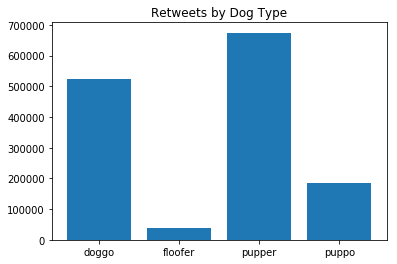

In [65]:
x = ['pupper', 'doggo', 'puppo', 'floofer']
y = [pupper, doggo, puppo, floofer]
plt.title('Retweets by Dog Type')
plt.bar(x, y)

While puppers have a four times as many records as doggos, they have just nearly as many retweets. Followers must really like doggos!

### Is there a relationship between retweets and favorites?

Text(0.5,1,'Retweets versus Favorites')

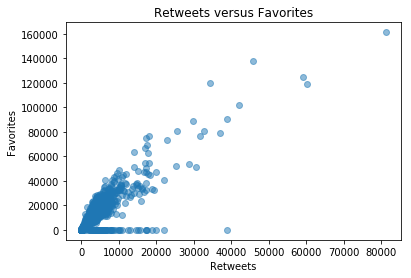

In [66]:
retweets = big_boy.retweet_count
favorites = big_boy.favorite_count

plt.scatter(retweets, favorites, alpha=.5)

plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Retweets versus Favorites')

There is clearly a strong positive correlation between retweets and favorites. As the number of retweets increases, so does the number of favorites. This is not surprising, as retweets reach a wider audience, thereby expanding the pool of people who can favorite.